# Learning and Decision Making

## Laboratory 4: Supervised learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The LFW dataset

The LFW (Labeled Faces in the Wild) data set is a collection of JPEG pictures of famous people collected over the internet. Each picture is centered on a single face and corresponds to a grayscale image of 62 $\times$ 47 pixels. 

---

We start by loading the dataset, selecting only those people in the dataset that appear in at least 50 pictures.

<IPython.core.display.Javascript object>


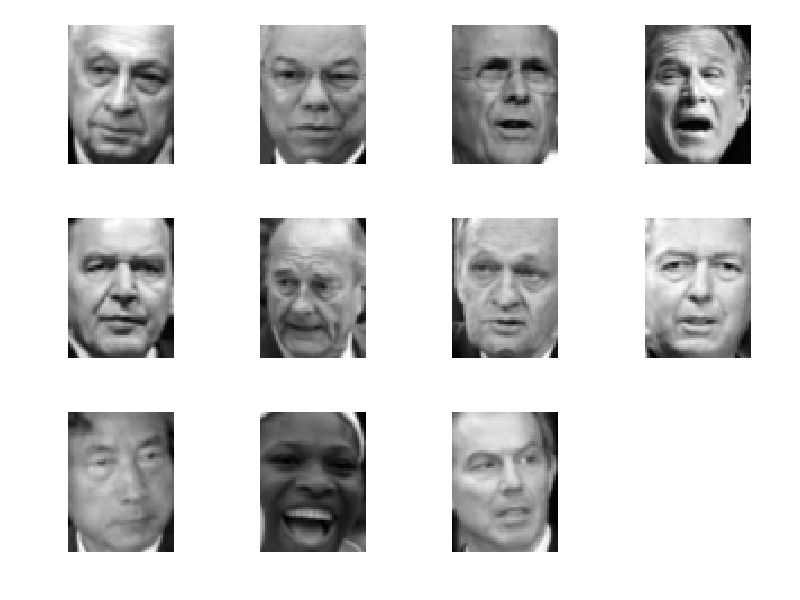

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person=50)

fig = plt.figure()

# Print sample digits
for i in range(11): 
    plt.subplot(3, 4, i + 1)
    idx=list(lfw.target).index(i)
    plt.imshow(lfw.images[idx], cmap=plt.cm.gray)
    plt.axis('off')

fig.tight_layout()
plt.show()

In the first activities, you will prepare the dataset, before running the learning algorithm.

---

#### Activity 1.        

From the LFW dataset, construct the training and test sets. The input data can be accessed as the attribute `data` in the dataset `lfw`; the corresponding output data can be accessed as the attribute `target` in `lfw`. To build the train and test sets, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. Make sure that the test set corresponds to 10% of your data. 

**Note:** Don't forget to import `numpy` and the necessary modules from `scikit-learn`. Also, for reproducibility, initialize the seed of the `train_test_split` function to a fixed number.

---

In [4]:
import numpy as np

from sklearn.model_selection import train_test_split

d_data = lfw.data
t_data = lfw.target

data_train, data_test, target_train, target_test = train_test_split(d_data, t_data, test_size=0.1)

print('Input data train:\n',data_train)
print('Input data test:\n',data_test)
print('Output data train:\n',target_train)
print('Output data test:\n',target_test)

Input data train:
 [[107.       105.       103.       ... 197.       197.33333  196.66667 ]
 [ 49.666668  54.        61.666668 ...  46.        50.666668  52.      ]
 [ 46.        68.666664  82.       ...  45.666668  30.666666  28.      ]
 ...
 [ 78.333336  87.        93.333336 ... 253.33333  252.       247.      ]
 [ 36.333332  25.333334  18.333334 ... 158.        82.333336  36.666668]
 [ 74.333336  83.333336  95.333336 ... 142.       189.33333  228.      ]]
Input data test:
 [[ 39.666668  40.666668  46.666668 ...  30.666666  31.        31.333334]
 [108.333336 126.       136.33333  ...  68.333336  72.        77.666664]
 [213.       216.66667  201.       ...  28.        29.        27.      ]
 ...
 [ 82.333336  98.       112.       ...  35.666668  44.        47.      ]
 [ 42.666668  42.666668  41.666668 ... 159.66667  158.       153.33333 ]
 [ 50.        56.        69.       ... 234.       226.33333  188.66667 ]]
Output data train:
 [3 3 3 ... 0 8 3]
Output data test:
 [ 3  6  3  2  3  3

Right now, each point in the dataset is represented by the pixel information, which roughly corresponds to 3,000 features. In this activity, you will determine a small number of alternative features that manage to capture most of the relevant information contained in each picture but which provide a much more compact representation thereto. Such features correspond to the _principal components_ and can be computed through the function `PCA`, in the `decomposition` module of `scikit-learn`. 

---

#### Activity 2.        

* Run PCA on the training set. To do this, you should first fit the PCA model to the data and then use the resulting model to transform the data. For details, check the documentation for the function `PCA`.

* To grasp how much of the information in the data is contained in the different components, plot the _cumulative explained variance_ (in percentage) as a function of the number of components. The explained variance can be accessed via the attribute `explained_variance_` of your model.

**Note:** In general, before running PCA on some training set, you should _normalize_ the data to make sure that all inputs lie in the same range. In our case, since all pixels lie in the same range, normalization is not necessary.

---

<IPython.core.display.Javascript object>


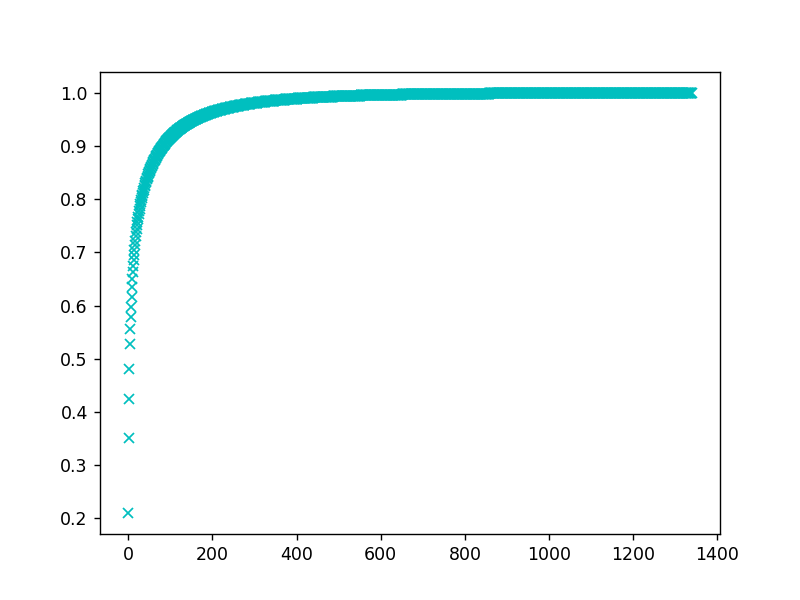

In [27]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


pca = PCA().fit(data_train)

i_train_pca = pca.transform(data_train)
#i_test_pca = pca.transform(data_test)

#print('Input data train transformed:\n',i_train_pca)
#print('Input data test transformed:\n',i_test_pca)                     #??????????????????????????????????????

#explained_variance_ratio_ - Percentage of variance explained by each of the selected components.
#variance = pca.explained_variance_ratio_ 

#Cumulative
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + cum_explained_var[i-1])

plt.figure()
#plt.plot(variance,'.', color='m')
plt.plot(cum_explained_var,'x', color='c')
plt.show()


Note how 50 components explain almost 90\% of the variance in the data. As such, it seems reasonable that we may rely only on those 50 components as features to represent our data. 

However, to clearly understand the implications of the adopted representation, you will now run an extensive test to investigate how the number of components may impact the performance of the classifier. 

---

#### Activity 3.        

Take the data in your training set and further split it in two sets, $D_T$ and $D_V$, where $D_T$ corresponds to $85\%$ of the training data and $D_V$ to the remaining $15\%$. You will use $D_T$ for training, and $D_V$ for validation. 

For $k\in\{10, 20, ..., 100\}$,

* Run PCA with $k$ components on the data in $D_T$
* Transform the data in $D_T$ using the computed PCA
* Train a logistic regression classifier on the transformed data, with $C=1000$
* Compute the error in $D_T$ and in $D_V$

Repeat the _whole process_ (including the split of $D_T$ and $D_V$) 30 times.

** Note: ** The whole process may take a while, so don't despair. The logistic classifier can be accessed by importing `LogisticRegression` from `sklearn.linear_model`. To compute the error of a classifier, you can use the `accuracy_score` function from `sklearn.metrics`.

---

In [36]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

start_time = time.time()

dDt, dDv, tDt, tDv = train_test_split(data_train, target_train, test_size=0.15)
    
score_train = [0]*10
score_validation = [0]*10
    
for i in range(30):
    for k in range(10,101,10):
        #print('.')
        pca = PCA(n_components=k).fit(dDt)
        
        tranformed_dDt = pca.transform(dDt)
        tranformed_tDt = pca.transform(dDv)
        
        classifier = LogisticRegression(C=1000).fit(tranformed_dDt,tDt)
        
        predict_d = classifier.predict(tranformed_dDt)
        predict_t = classifier.predict(tranformed_tDt)
            
        score_train[int(k/10-1)] += accuracy_score(tDt,predict_d)
        score_validation[int(k/10-1)] += accuracy_score(tDv,predict_t)
        
    #print(score_train)
    #print(score_validation)


elapsed_time = time.time() - start_time
print('elapsed time: ', elapsed_time)


elapsed time:  1238.1128499507904


---

#### Activity 4.        

Plot the average training and validation error from Activity 3 as a function of $k$. Comment.

---

<IPython.core.display.Javascript object>


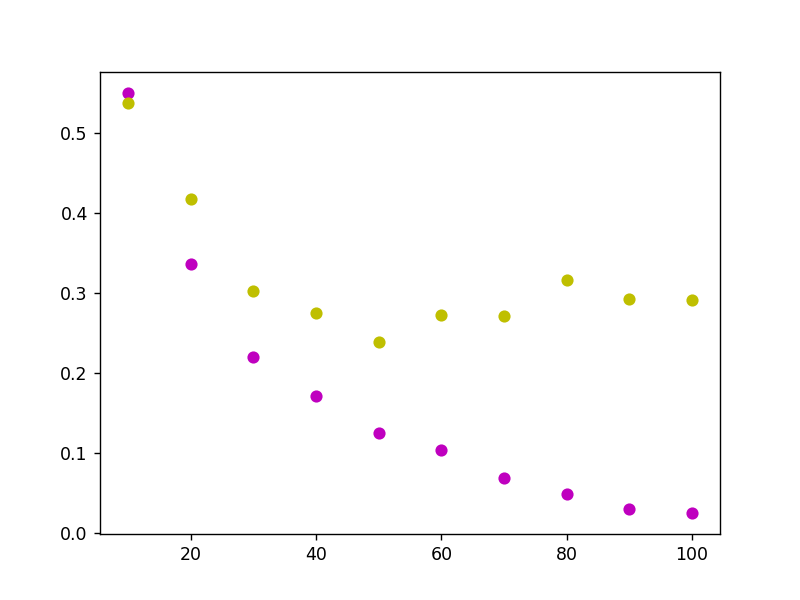

In [37]:
for i in range(len(score_train)):
    score_train[i] = 1 - score_train[i]/30
    score_validation[i] = 1 - score_validation[i]/30  
    
plt.figure()
plt.plot([10,20,30,40,50,60,70,80,90,100],score_train,'o', color='m')
plt.plot([10,20,30,40,50,60,70,80,90,100],score_validation,'o', color='y')
plt.show()

Activity 4 -- Coment:

The training data has a lower error than the validation data as is expected, because the classifier is trained (fitted) with the train data, so when applied to the validation data the error is higher than for the training data.

As seen in the homework, the logistic regression model is trained to minimize the cost function

$$J(\pi)=-\frac{1}{N}\sum_{n=1}^N\log(\pi(a_n\mid x_n)).$$

However, the logistic regression model in `scikit-learn` uses a slightly different cost function; this modified cost function includes a term that penalizes large values for the parameters $\mathbf{w}$ and takes the general form

$$J(\pi)=\frac{1}{2}\|w\|^2-\frac{C}{N}\sum_{n=1}^N\log(\pi(a_n\mid x_n)).$$

The first term is called a _regularization term_ and the constant $C$ expresses how much we are willing to pay (in terms of errors in the training set) to have small parameter vectors. In activity 3 you used a large value for $C$, indicating the algorithm that errors in the training set should be minimized.

---

#### Activity 5.

Repeat Activity 3 but now setting $C=1$. Plot the results and comment.

---

elapsed_time: 912.8087198734283


<IPython.core.display.Javascript object>


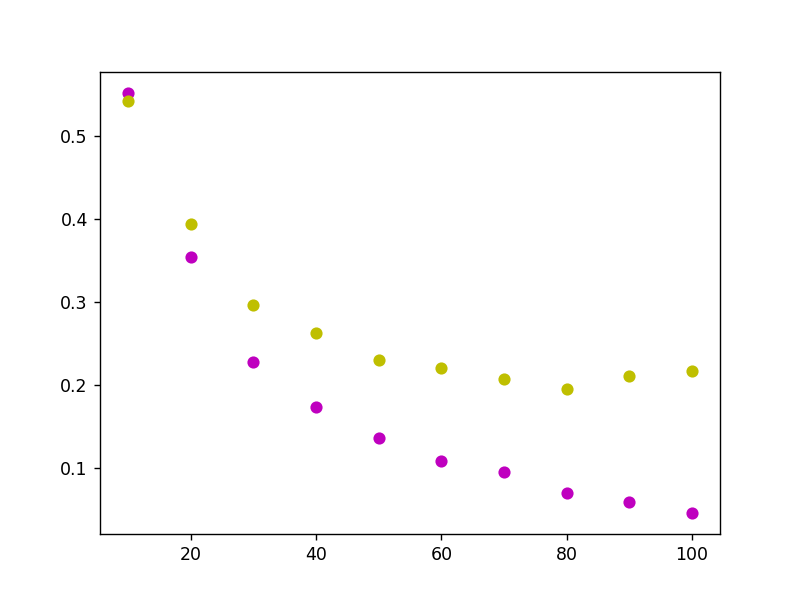

In [39]:
start_time = time.time()

dDt, dDv, tDt, tDv = train_test_split(data_train, target_train, test_size=0.15)
    
score_train = [0]*10
score_validation = [0]*10
    
for i in range(30):
    for k in range(10,101,10):
        #print('.')
        pca = PCA(n_components=k).fit(dDt)
        
        tranformed_dDt = pca.transform(dDt)
        tranformed_tDt = pca.transform(dDv)
        
        classifier = LogisticRegression(C=1).fit(tranformed_dDt,tDt)
        
        predict_d = classifier.predict(tranformed_dDt)
        predict_t = classifier.predict(tranformed_tDt)
            
        score_train[int(k/10-1)] += accuracy_score(tDt,predict_d)
        score_validation[int(k/10-1)] += accuracy_score(tDv,predict_t)
        
    #print(score_train)
    #print(score_validation)


elapsed_time = time.time() - start_time
print('elapsed_time:',elapsed_time)

for i in range(len(score_train)):
    score_train[i] = 1 - score_train[i]/30
    score_validation[i] = 1 - score_validation[i]/30  
    
plt.figure()
plt.plot([10,20,30,40,50,60,70,80,90,100],score_train,'o', color='m')
plt.plot([10,20,30,40,50,60,70,80,90,100],score_validation,'o', color='y')
plt.show()

Activity 5 -- Comment:

The difference between the error with the train data and the validation data is slightly shortened with C=1, in comparisson with C=1000 (activity 3 and 4). This happens because for a smaller value of C, we increase the regularization strength which will create simple models which underfit the data, meaning that the classifier is more apt to deal with different data that the training data (like the validation data).

But the error in general may increase, exactly because of the model that underfits the data.

In light of the results, we can now safely train our classifier with a larger number of components (say, $k=80$) by setting $C=1$ to avoid overfitting.

---

#### Activity 6.

* Retrain your PCA model with $k=80$ components---now using all your training data;
* Retrain the logistic regression model;
* Compute the performance of the resulting model in the test data (don't forget to transform the test data).

In particular, compute both the accuracy score and print the confusion matrix (which you can access from `sklearn.metrics`). Comment the obtained results in face of Activities 3-5.

---

In [40]:
from sklearn.metrics import confusion_matrix 

score_train = 0
score_validation = 0

pca = PCA(n_components=80).fit(data_train)

#tranformed_data = pca.transform(data_train)
tranformed_test = pca.transform(data_test)

classifier = LogisticRegression(C=1).fit(tranformed_data,target_train)

#prediction = classifier.predict(tranformed_data)
predict_t = classifier.predict(tranformed_test)


#score_train += accuracy_score(target_train,prediction)
#matrix = confusion_matrix(target_train,prediction)

score_test = accuracy_score(target_test,predict_t)
matrix_t = confusion_matrix(target_test,predict_t)

#print( 1 - score_train)
#print(matrix)

print(1 - score_test)
print(matrix_t)

0.3087248322147651
[[ 8  0  1  1  0  0  0  0  0  0  0]
 [ 1 13  0  2  0  1  0  1  1  1  0]
 [ 0  1  7  4  1  0  0  0  0  0  1]
 [ 0  2  3 41  1  1  1  0  0  0  1]
 [ 1  1  0  0  7  0  0  0  0  0  2]
 [ 0  0  0  0  0  2  1  0  0  0  1]
 [ 0  0  0  0  0  0  3  0  0  0  0]
 [ 1  3  1  0  2  0  0  3  0  0  0]
 [ 0  0  0  0  0  1  0  0  2  0  0]
 [ 0  1  0  0  0  1  0  0  1  6  0]
 [ 0  1  0  3  0  0  0  0  0  0 11]]


Activty 6 -- Comment:

In activities 3-5 we're  spliting the training data into test and validation data, and use those two to determine good values of C and k to use.

After, we use those and apply them to all the training data, and we can see that the error is low because of the good values of C an k found.

And, as seen in the matrix the higher values are all in its diagonal, so mostly all of the images expected are found.